Создаем графики и отображаем их

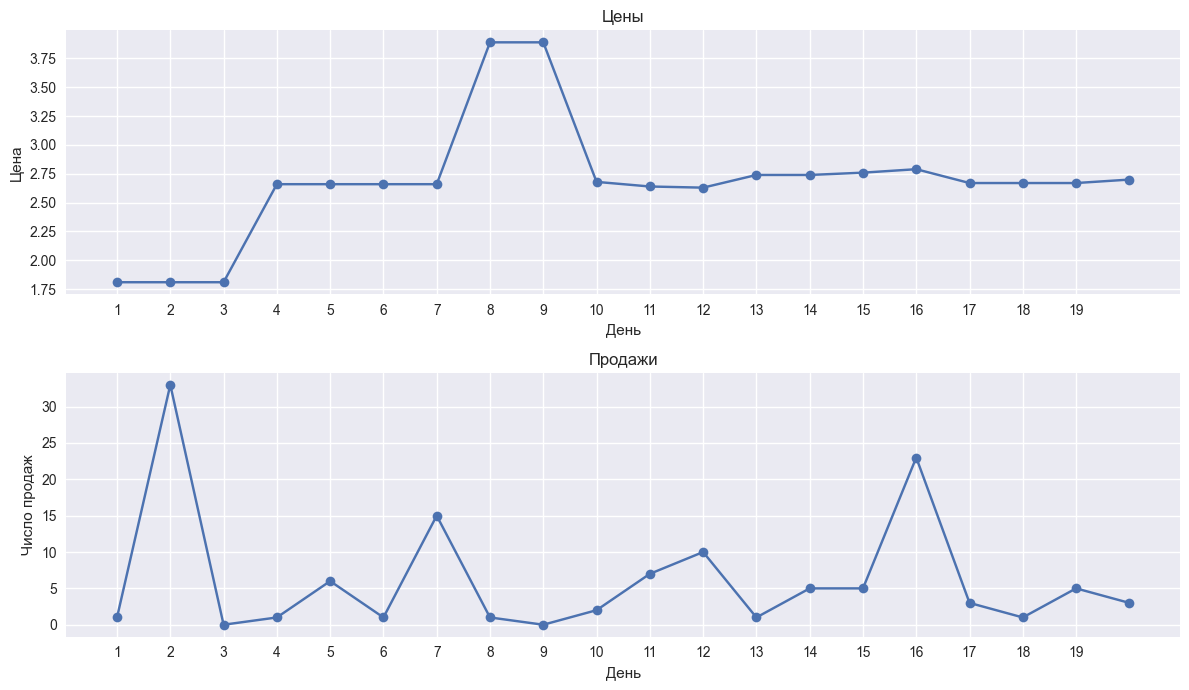

In [314]:
import csv
from math import sqrt, log10, floor, ceil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('seaborn-v0_8')
with open("DataSet.csv", newline='\n') as fp:
    reader = csv.reader(fp, delimiter=';', )
    data = [row for row in reader]
    title = data[0]
    data = data[1:]

dates = [i for i in range(1, 21)]
prices = [float(row[1].replace(',', '.')) for row in data]
sales = [int(row[2]) for row in data]

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

price_plot = ax[0]
price_plot.plot(dates, prices, marker='o', label='Цена')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')
price_plot.set_xticks(np.arange(min(dates), max(dates), 1))

price_plot.locator_params('y', nbins=len(set(prices)))

ax[0] = price_plot
price_plot.grid(True)

sales_plot = ax[1]
sales_plot.plot(dates, sales, marker='o', label='Продажи')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')
sales_plot.set_xticks(np.arange(min(dates), max(dates), 1))

ax[1] = sales_plot
sales_plot.grid(True)
fig.tight_layout()
plt.show()

Определим и нанесем на график среднее значение (математическое ожидание (М(Х)), значение медианы (Ме) и моды (Мо).

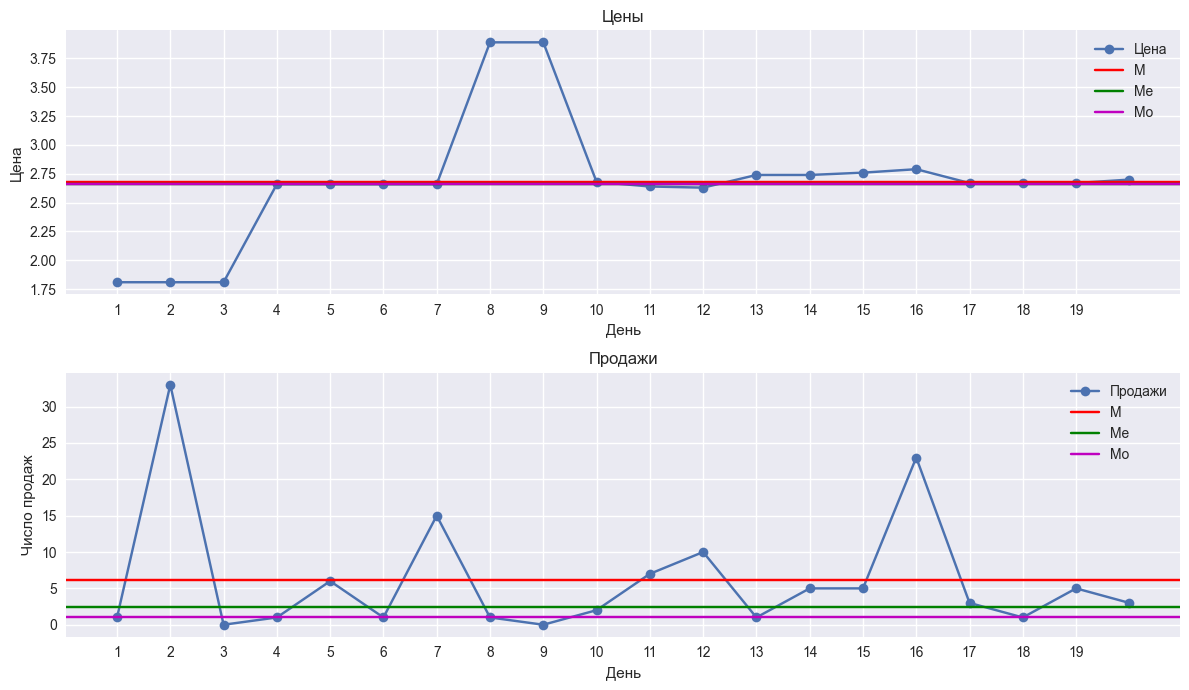

In [315]:
n = len(prices)
prices_sorted = sorted(prices)
sales_sorted = sorted(sales)
M_price = sum(prices) / len(prices)
M_sales = sum(sales) / len(sales)

Me_price = (prices_sorted[n // 2 - 2] + prices_sorted[n // 2 - 1]) / 2
Me_sales = (sales_sorted[n // 2 - 2] + sales_sorted[n // 2 - 1]) / 2

Mo_price = max(prices, key=prices.count)
Mo_sales = max(sales, key=sales.count)
# Отображаем выведенные значения на графике
price_plot.axhline(y=M_price, color='r', label='M')
price_plot.axhline(y=Me_price, color='g', label='Me')
price_plot.axhline(y=Mo_price, color='m', label='Mo')

sales_plot.axhline(y=M_sales, color='r', label='M')
sales_plot.axhline(y=Me_sales, color='g', label='Me')
sales_plot.axhline(y=Mo_sales, color='m', label='Mo')

price_plot.legend(fontsize=10, shadow=True)
sales_plot.legend(fontsize=10, shadow=True)
fig.tight_layout()
fig

Считаем среднее геометрическое, гармоническое значение, дисперсию и среднеквадратичное отклонение для цен и продаж

In [316]:
avg_geom_price = 1
for price in prices:
    avg_geom_price *= price
avg_geom_price = avg_geom_price ** (1 / n)

avg_geom_sale = 1
for sale in sales:
    avg_geom_sale *= sale
avg_geom_sale = avg_geom_sale ** (1 / n)

# Гармоничные значения
try:
    har_sum = 0
    for price in prices:
        har_sum += 1 / price
    har_price = n / har_sum
except:
    har_price = None

try:
    har_sum = 0
    for sale in sales:
        har_sum += 1 / sale
    har_sale = n / har_sum
except:
    har_sale = None

# Дисперсия
D_sum = 0
for price in prices:
    D_sum += (M_price - price) ** 2
D_price = D_sum / n

D_sum = 0
for sale in sales:
    D_sum += (M_sales - sale) ** 2
D_sale = D_sum / n

# Среднеквадратичное отклонение
SD_price = sqrt(D_price)
SD_sale = sqrt(D_sale)
print('Цена:')
print(f'Среднее геометрическое: {avg_geom_price}\n'
      f'Гармоническое значение: {har_price}\n'
      f'Дисперсия: {D_price}\n'
      f'Среднее квадратичное отклонение: {SD_price}\n')

print('Продажи:')
print(f'Среднее геометрическое: {avg_geom_sale}\n'
      f'Гармоническое значение: {har_sale}\n'
      f'Дисперсия: {D_sale}\n'
      f'Среднее квадратичное отклонение: {SD_sale}\n')

Цена:
Среднее геометрическое: 2.628774874145723
Гармоническое значение: 2.5799321724081032
Дисперсия: 0.26154099999999997
Среднее квадратичное отклонение: 0.5114107937851918

Продажи:
Среднее геометрическое: 0.0
Гармоническое значение: None
Дисперсия: 68.7275
Среднее квадратичное отклонение: 8.290205063808736


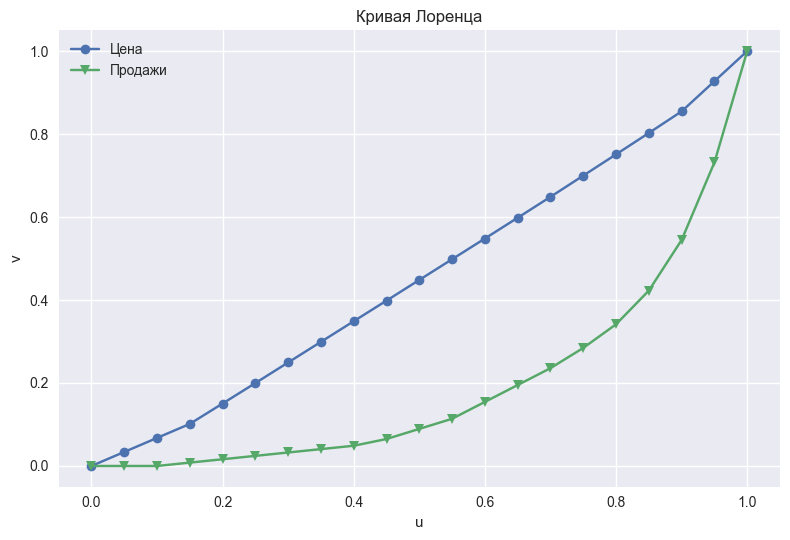

In [317]:
# Строим кривую Лоренца
u = [0]
v_price = [0]
v_sale = [0]

for j in range(1, 21):
    u.append(j / n)
    v_price.append(sum(sorted(prices)[:j]) / sum(prices))
    v_sale.append((sum(sorted(sales)[:j])) / sum(sales))

plt.plot(u, v_price, marker='o', label='Цена')
plt.plot(u, v_sale, marker='v', label='Продажи')

plt.xlabel('u')
plt.ylabel('v')
plt.title('Кривая Лоренца')
plt.grid(True)

plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

Считаем значение коэффициента Джинни и индекса Херфиндаля

In [318]:
G_price = ((2 * sum([(i + 1) * prices_sorted[i] for i in range(n)])) / (
        n * sum(prices))) - ((n + 1) / n)
H_price = sum([(price / sum(prices)) ** 2 for price in prices])

G_sale = ((2 * sum([dates[i] * sales_sorted[i] for i in range(n)])) / (
        n * sum(sales))) - ((n + 1) / n)
H_sale = sum([(sale / sum(sales)) ** 2 for sale in sales])

print('Цена:')
print(f'Коэффициент Джинни: {G_price}\n'
      f'Индекс Херфиндаля: {H_price}\n')

print('Продажи:')
print(f'Коэффициент Джинни: {G_sale}\n'
      f'Индекс Херфиндаля: {H_sale}\n')

Цена:
Коэффициент Джинни: 0.0873178931639893
Индекс Херфиндаля: 0.051824790628507277

Продажи:
Коэффициент Джинни: 0.615040650406504
Индекс Херфиндаля: 0.14085531099213433


Строим вариационный ряд, 

# Вторая лабораторная

## Строим вариационный ряд, частотную таблицу и интервальный ряд

In [319]:
df = pd.DataFrame({' ': dates, 'Цены': prices_sorted, 'Продажи': sales_sorted})
#print(df.to_string(index=False))
print('\nЧастотная таблица для цен:')
frequency_prices = pd.crosstab(index=df['Цены'], columns='Повторения')

frequency_prices['Частота'] = frequency_prices / len(dates)
print(frequency_prices)

print('\nЧастотная таблица для продаж:')
frequency_sales = pd.crosstab(index=df['Продажи'], columns='Повторения')

frequency_sales['Частота'] = frequency_sales / len(dates)
print(frequency_sales)


Частотная таблица для цен:
col_0  Повторения  Частота
Цены                      
1.81            3     0.15
2.63            1     0.05
2.64            1     0.05
2.66            4     0.20
2.67            3     0.15
2.68            1     0.05
2.70            1     0.05
2.74            2     0.10
2.76            1     0.05
2.79            1     0.05
3.89            2     0.10

Частотная таблица для продаж:
col_0    Повторения  Частота
Продажи                     
0                 2     0.10
1                 6     0.30
2                 1     0.05
3                 2     0.10
5                 3     0.15
6                 1     0.05
7                 1     0.05
10                1     0.05
15                1     0.05
23                1     0.05
33                1     0.05


## Строим интервальный ряд

In [320]:
# Количество интервалов
k = 1 + floor(3.32 * log10(len(prices)))
# Ширина интервала
h_price = round((max(prices) - min(prices)) / k, 6)
h_sales = round((max(sales) - min(sales)) / k, 6)
print(f'h цены: {h_price}')
print(f'h продаж: {h_sales}')
# Создаем интервальный ряд
# Создаем интервальный ряд
intervals_price = pd.interval_range(start=df['Цены'].min(),
                                    end=df['Цены'].max(),
                                    freq=h_price + 0.00000000000001,
                                    closed='left')

intervals_sales = pd.interval_range(start=df['Продажи'].min(),
                                    end=df['Продажи'].max(),
                                    freq=h_sales + 0.00000000000001,
                                    closed='left')


def round_intervals(inter: pd.Interval):
    if round(inter.right, 6) == max(df['Цены']) or round(inter.right, 6) == max(
            df['Продажи']):
        return pd.Interval(round(inter.left, 6), round(inter.right, 6), 'both')
    return pd.Interval(round(inter.left, 6), round(inter.right, 6),
                       inter.closed)


# Группируем данные по интервалам
df['Цены_интервал'] = pd.cut(df['Цены'], bins=intervals_price, right=True)
df['Цены_интервал'] = df['Цены_интервал'].apply(lambda x: round_intervals(x))
frequency_prices_interval = df.groupby('Цены_интервал', observed=False).size()

# Вычисляем относительную частоту
frequency_prices_normalized = frequency_prices_interval / n

# Аналогично для продаж
df['Продажи_интервал'] = pd.cut(df['Продажи'], bins=intervals_sales, right=True)
df['Продажи_интервал'] = df['Продажи_интервал'].apply(
    lambda x: round_intervals(x))
frequency_sales_interval = df.groupby('Продажи_интервал', observed=False).size()
frequency_sales_normalized = frequency_sales_interval / n

# Выводим результаты
print("Интервальный ряд для цен:")
print(frequency_prices_normalized)

print("\nИнтервальный ряд для продаж:")
print(frequency_sales_normalized)
print(type(frequency_sales_normalized))


h цены: 0.416
h продаж: 6.6
Интервальный ряд для цен:
Цены_интервал
[1.81, 2.226)     0.15
[2.226, 2.642)    0.10
[2.642, 3.058)    0.65
[3.058, 3.474)    0.00
[3.474, 3.89]     0.10
dtype: float64

Интервальный ряд для продаж:
Продажи_интервал
[0.0, 6.6)      0.75
[6.6, 13.2)     0.10
[13.2, 19.8)    0.05
[19.8, 26.4)    0.05
[26.4, 33.0]    0.05
dtype: float64
<class 'pandas.core.series.Series'>


# Строим Полигоны частот

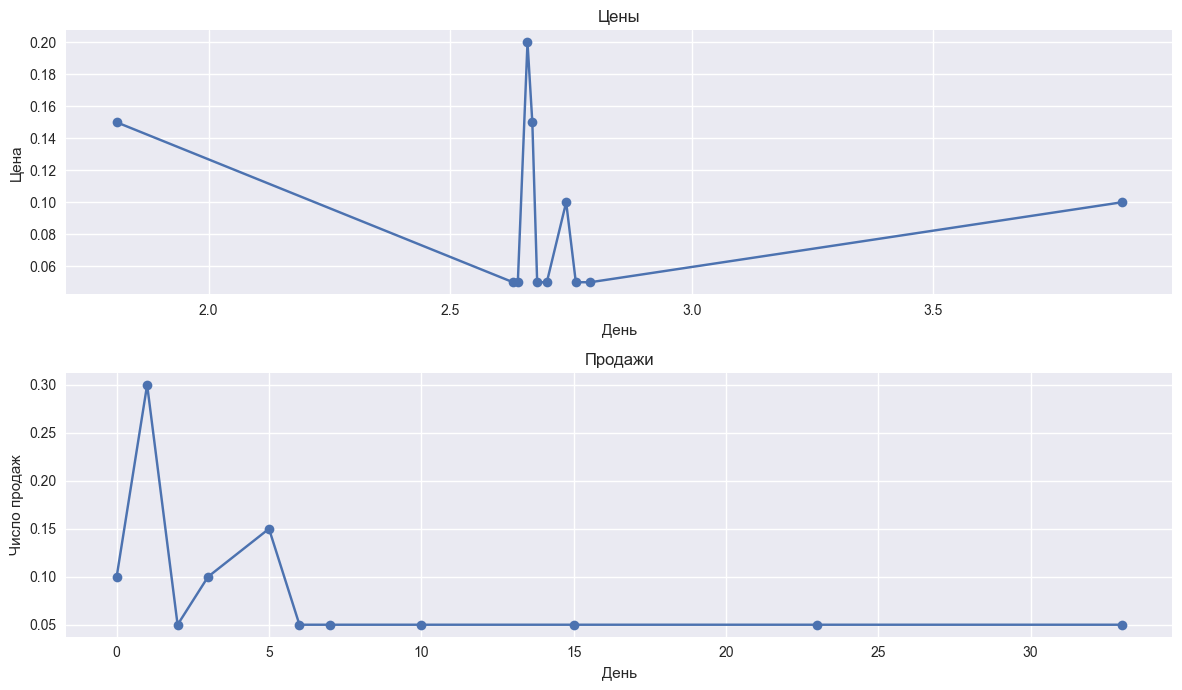

In [321]:

fig, ax = plt.subplots(2, 1, figsize=(12, 7))
price_plot = ax[0]
price_plot.plot(sorted(list(set(prices))), frequency_prices['Частота'],
                marker='o', label='Полигон частот для цены')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')

ax[0] = price_plot
price_plot.grid(True)

sales_plot = ax[1]
sales_plot.plot(sorted(list(set(sales))), frequency_sales['Частота'],
                marker='o', label='Полигон частот для продаж')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')

ax[1] = sales_plot
sales_plot.grid(True)
fig.tight_layout()
plt.show()

# Строим гистограмму интервального ряда

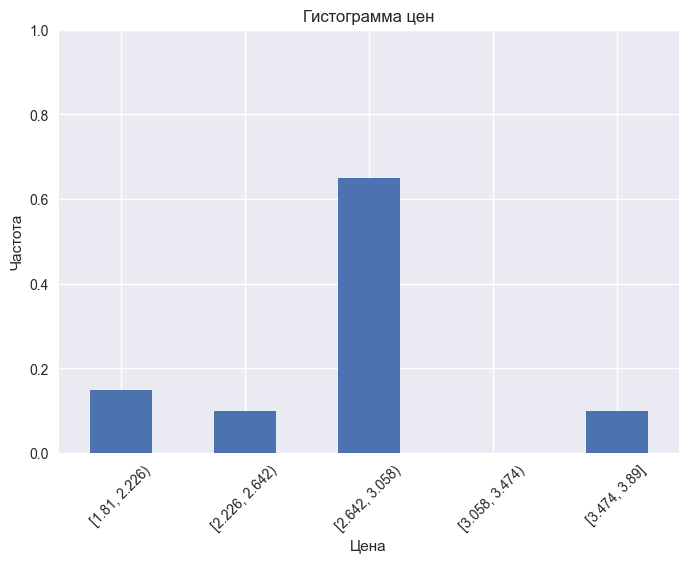

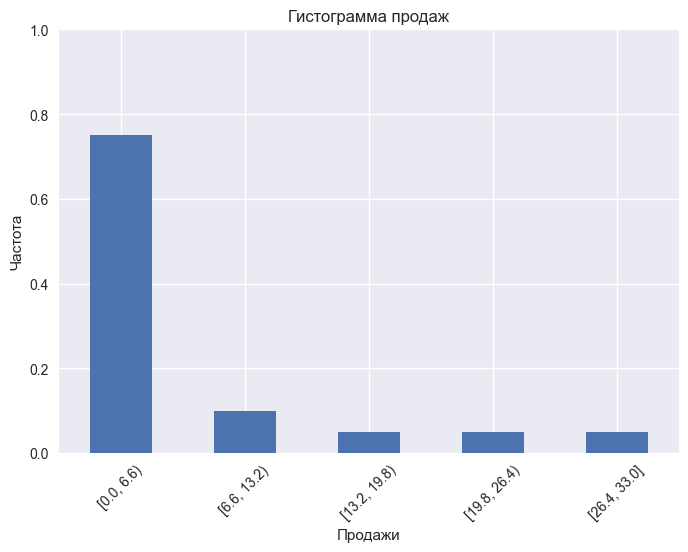

In [322]:
frequency_prices_normalized.sort_index().plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Гистограмма цен')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Создаем гистограмму для продаж
frequency_sales_normalized.sort_index().plot(kind='bar')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.title('Гистограмма продаж')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

0.0 x<-inf
0.15 x<1.81
0.2 x<2.63
0.25 x<2.64
0.45 x<2.66
0.6 x<2.67
0.65 x<2.68
0.7 x<2.7
0.8 x<2.74
0.85 x<2.76
0.9 x<2.79
1.0 x<3.89


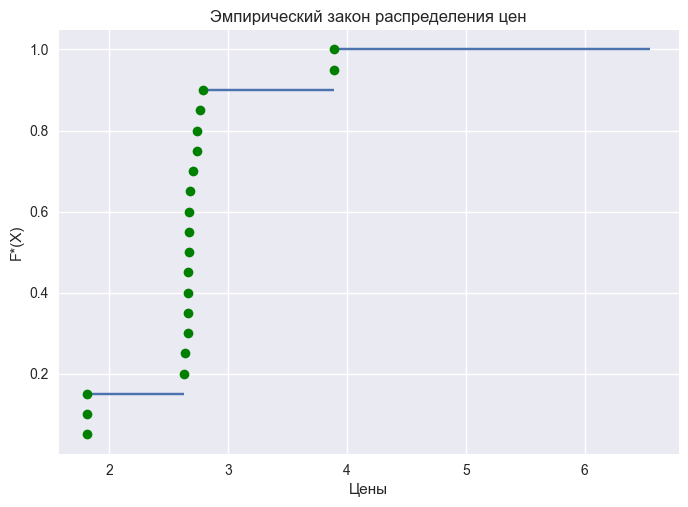

0.0 x<-inf
0.1 x<0.0
0.4 x<1.0
0.45 x<2.0
0.55 x<3.0
0.7 x<5.0
0.75 x<6.0
0.8 x<7.0
0.85 x<10.0
0.9 x<15.0
0.95 x<23.0
1.0 x<33.0


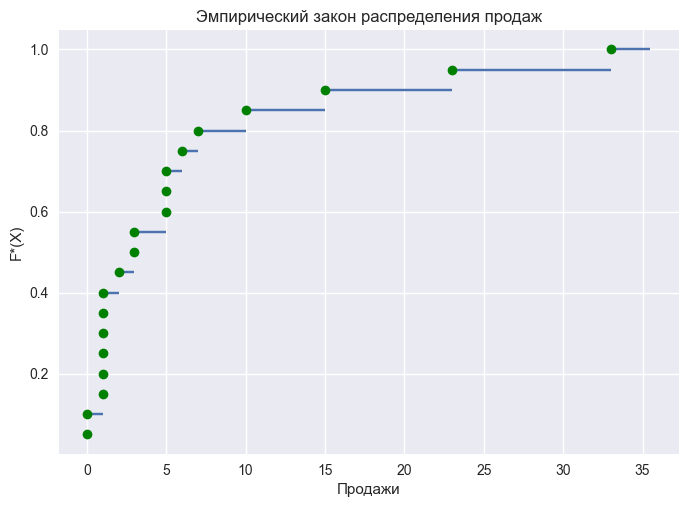

In [323]:
ecdf_prices = ECDF(df['Цены'])
ecdf_dict_prices = {}

xmax = [i for i in ecdf_prices.x] + [max(prices) + Me_price]

plt.hlines(y=sorted(set(ecdf_prices.y)), xmin=ecdf_prices.x, xmax=xmax[1:])
plt.grid(True)
for x, y in zip(ecdf_prices.x, ecdf_prices.y):
    ecdf_dict_prices[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_prices.items():
    print(v, k)
plt.xlabel('Цены')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения цен')
plt.show()

ecdf_sales = ECDF(df['Продажи'])
ecdf_dict_sales = {}

xmax = [i for i in ecdf_sales.x] + [max(sales) + Me_sales]

plt.hlines(y=sorted(set(ecdf_sales.y)), xmin=ecdf_sales.x, xmax=xmax[1:])
plt.grid(True)
for x, y in zip(ecdf_sales.x, ecdf_sales.y):
    ecdf_dict_sales[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_sales.items():
    print(v, k)
plt.xlabel('Продажи')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения продаж')
plt.show()

## Энтропия временного ряда

In [324]:
from numpy import log


def calc_entropy(column):
    result = 0
    for i in column:
        if i == 0:
            return None
        result -= i * log(i)
    return result


print('Энтропия по частотным таблицам')
print('Для цен: ', calc_entropy(frequency_prices['Частота']))
print('Для продаж: ', calc_entropy(frequency_sales['Частота']))

print('\nЭнтропия по интервалам (для гистограммы)')
print('Для цен: ', calc_entropy(frequency_prices_normalized))
print('Для продаж: ', calc_entropy(frequency_sales_normalized))

print('\nЭнтропия по теоретическим законам распределения')
print('Для цен: ', calc_entropy(list(ecdf_dict_prices.values())[1:]))
print('Для продаж: ', calc_entropy(list(ecdf_dict_sales.values())[1:]))

Энтропия по частотным таблицам
Для цен:  2.2502602786175907
Для продаж:  2.154783153373369

Энтропия по интервалам (для гистограммы)
Для цен:  None
Для продаж:  0.8953799046713388

Энтропия по теоретическим законам распределения
Для цен:  2.5600147594909943
Для продаж:  2.2105566557432965


## Box-plot диаграмма

            Q5    Q25    Q50    Q75    Q95    IQR  Q25-1.5*IQR  Q75+1.5*IQR    Min    Max
   Цена   1.81   2.64   2.67   2.74   3.89    0.1         2.49         2.89   2.63   2.79
Продажи   0.00   1.00   3.00   6.00  23.00    5.0        -6.50        13.50   0.00  10.00


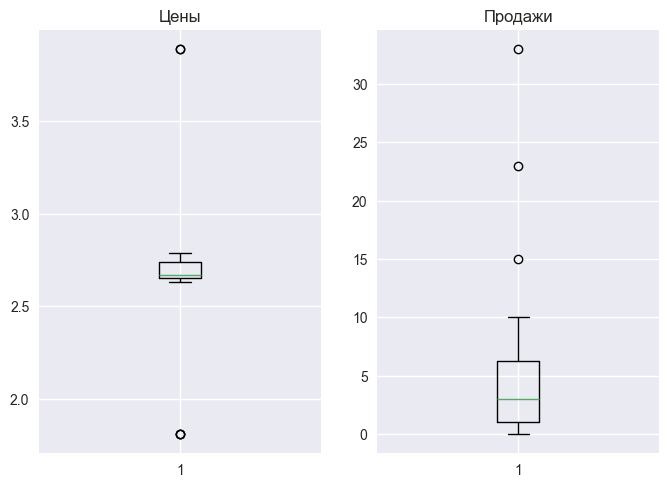

In [325]:
boxplot_data = pd.DataFrame()
boxplot_data[' '] = ['Цена', 'Продажи']
for i in [5, 25, 50, 75, 95]:
    index1, index2 = ceil(n * i / 100) - 1, floor(n * i / 100) - 1
    if index1 == index2:
        boxplot_data[f'Q{i}'] = [prices_sorted[index1],
                                 sales_sorted[index1]]
    else:
        res = []
        for part in [prices_sorted, sales_sorted]:
            res.append(round((part[index1] + part[index2]) / 2, 6))
        boxplot_data[f'Q{i}'] = res

boxplot_data['IQR'] = boxplot_data['Q75'] - boxplot_data['Q25']
boxplot_data['Q25-1.5*IQR'] = boxplot_data['Q25'] - 1.5 * boxplot_data['IQR']
boxplot_data['Q75+1.5*IQR'] = boxplot_data['Q75'] + 1.5 * boxplot_data['IQR']
boxplot_data['Min'] = [
    min([i for i in prices if i > boxplot_data['Q25-1.5*IQR'][0]]),
    min([i for i in sales if i > boxplot_data['Q25-1.5*IQR'][1]])]
boxplot_data['Max'] = [
    max([i for i in prices if i < boxplot_data['Q75+1.5*IQR'][0]]),
    max([i for i in sales if i < boxplot_data['Q75+1.5*IQR'][1]])]
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df['Цены'])
axs[0].set_title('Цены')
axs[1].boxplot(df['Продажи'])
axs[1].set_title('Продажи')
print(boxplot_data.to_string(index=False, col_space=6))
plt.show()

# Третья лабораторная

## Строим функцию Лагранжа

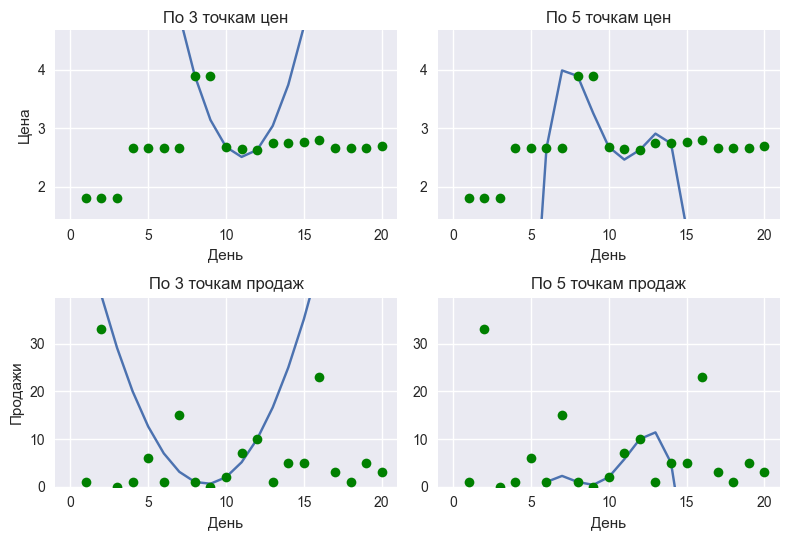

In [326]:
days3 = [8, 10, 12]
days5 = [6, 8, 10, 12, 14]


def build_lagrange_func(data_trg, days: list):
    x_cur = np.linspace(start=0, stop=19, num=20)
    res_y = 0
    for i in days:

        curr_days = days.copy()
        curr_days.remove(i)
        y = data_trg[i - 1]
        for j in range(len(curr_days)):
            y *= (x_cur - curr_days[j]) / (i - curr_days[j])
        res_y += y
    return x_cur, res_y


fig1, axs = plt.subplots(2, 2)
datas = [prices, sales]
days_arg = [days3, days5]
for i in range(2):
    for j in range(2):
        x, y = build_lagrange_func(datas[i], days_arg[j])
        axs[i][j].plot(x, y)
        axs[i][j].grid(True)
        axs[i][j].set_ylim(min(datas[i]) * 0.8, max(datas[i]) * 1.2)
        axs[i][j].set_xlabel('День')
for x, y in zip(dates, prices):
    axs[0][0].plot(x, y, 'go')
    axs[0][1].plot(x, y, 'go')
for x, y in zip(dates, sales):
    axs[1][0].plot(x, y, 'go')
    axs[1][1].plot(x, y, 'go')
axs[0][0].set_title('По 3 точкам цен')
axs[0][1].set_title('По 5 точкам цен')
axs[1][0].set_title('По 3 точкам продаж')
axs[1][1].set_title('По 5 точкам продаж')
axs[0][0].set_ylabel('Цена')
axs[1][0].set_ylabel('Продажи')
plt.tight_layout()
plt.show()

## Цены и продажи для 5 и 15 дней многочленом Ньютона

In [327]:
def third_neuton(data_targ: list[int], left_day):
    days = [left_day - 2, left_day - 1, left_day + 1]
    first = [(data_targ[days[1] - 1] - data_targ[days[0] - 1]) / (
            days[1] - days[0]),
             (data_targ[days[2] - 1] - data_targ[days[1] - 1]) / (
                     days[2] - days[1])]
    second = (first[1] - first[0]) / (days[2] - days[0])
    result = data_targ[days[0] - 1] + first[0] * (
            left_day - days[0]) + second * (left_day - days[0]) * (
                     left_day - days[1])
    return round(result, 2)


print('Для цен:')
print(f'В точке 5: {third_neuton(prices, 5)}')
print(f'В точке 15: {third_neuton(prices, 15)}')
print('Для продаж:')
print(f'В точке 5: {third_neuton(sales, 5)}')
print(f'В точке 15: {third_neuton(sales, 15)}')

Для цен:
В точке 5: 2.94
В точке 15: 2.76
Для продаж:
В точке 5: 1.33
В точке 15: 12.33


In [328]:


def compare_error():
    compare_df = pd.DataFrame()
    compare_df['День'] = [5, 15, 'Ошибка']
    compare_df['Цена'] = [prices[4], prices[14], '']
    compare_df['M'] = [M_price, M_price,
                       abs(prices[4] - M_price) + abs(prices[14] - M_price)]
    compare_df['Me'] = [Me_price, Me_price,
                        abs(prices[4] - Me_price) + abs(prices[14] - Me_price)]
    compare_df['Ср пред+послед'] = [(prices[3] + prices[5]) / 2,
                                    (prices[13] + prices[15]) / 2, abs(
            prices[4] - (prices[3] + prices[5]) / 2) + abs(
            prices[14] - (prices[13] + prices[15]) / 2)]
    compare_df['Интерполяция многочленом Н'] = [third_neuton(prices, 5),
                                                third_neuton(prices, 15), abs(
            prices[4] - third_neuton(prices, 5)) + abs(
            prices[14] - third_neuton(prices, 15))]
    print('Для цены:')
    print(compare_df.to_string(index=False))
    compare_df = pd.DataFrame()
    compare_df['День'] = [5, 15, 'Ошибка']
    compare_df['Продажи'] = [sales[4], sales[14], '']
    compare_df['M'] = [M_sales, M_sales,
                       abs(sales[4] - M_sales) + abs(sales[14] - M_sales)]
    compare_df['Me'] = [Me_sales, Me_sales,
                        abs(sales[4] - Me_sales) + abs(sales[14] - Me_sales)]
    compare_df['Ср пред+послед'] = [(sales[3] + sales[5]) / 2,
                                    (sales[13] + sales[15]) / 2, abs(
            sales[4] - (sales[3] + sales[5]) / 2) + abs(
            sales[14] - (sales[13] + sales[15]) / 2)]
    compare_df['Интерполяция многочленом Н'] = [third_neuton(sales, 5),
                                                third_neuton(sales, 15), abs(
            sales[4] - third_neuton(sales, 5)) + abs(
            sales[14] - third_neuton(sales, 15))]
    print('\nДля продаж:')
    print(compare_df.to_string(index=False))


compare_error()

Для цены:
  День  Цена     M    Me  Ср пред+послед  Интерполяция многочленом Н
     5  2.66 2.677 2.665           2.660                        2.94
    15  2.76 2.677 2.665           2.765                        2.76
Ошибка       0.100 0.100           0.005                        0.28

Для продаж:
  День Продажи    M  Me  Ср пред+послед  Интерполяция многочленом Н
     5       6 6.15 2.5             1.0                        1.33
    15       5 6.15 2.5            14.0                       12.33
Ошибка         1.30 6.0            14.0                       12.00


# Четвертый семинар


Функциональная зависимость:
[0, 2.85]
[1, 2.7383333333333333]
[2, 2.68]
[3, 2.685]
[5, 2.723333333333333]
[6, 2.66]
[7, 2.64]
[10, 2.63]
[15, 2.66]
[23, 2.79]
[33, 1.81]
Функция: f(x)=2.8146217554644797-0.01994450136612018x


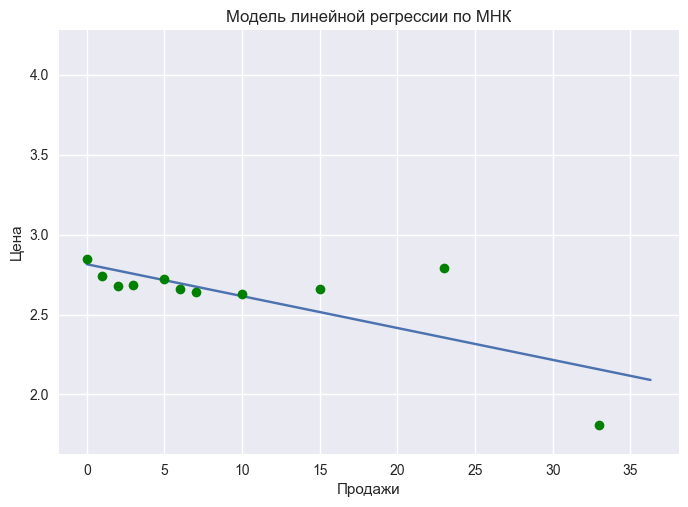

In [329]:
price_sales_func = []
sales_price_func = []

price_sales_dict = {}
sales_price_dict = {}

for i in range(n):
    price = prices[i]
    sale = sales[i]

    if price_sales_dict.get(price):
        price_sales_dict[price].append(sale)
    else:
        price_sales_dict[price] = [sale]
    if sales_price_dict.get(sale):
        sales_price_dict[sale].append(price)
    else:
        sales_price_dict[sale] = [price]

price_sales_func = sorted(
    [[k, sum(v) / len(v)] for k, v in price_sales_dict.items()])
sales_price_func = sorted(
    [[k, sum(v) / len(v)] for k, v in sales_price_dict.items()])
print('Функциональная зависимость:')
print('\n'.join(list(map(str, sales_price_func))))
A_price = np.array([[1, x[0]] for x in sales_price_func])
y_price = np.array([x[1] for x in sales_price_func])
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)
print(f'Функция: f(x)={c[0]}{"+" if c[1] > 0 else ""}{c[1]}x')
x = np.linspace(0, max(sales) * 1.1, 1000)
f_price = c[0] + c[1] * x
plt.plot(x, f_price)
plt.ylim(0.9 * min(prices), 1.1 * max(prices))
plt.grid(True)
for i in sales_price_func:
    plt.plot(i[0], i[1], 'go')

plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Модель линейной регрессии по МНК')
plt.show()

Функциональная зависимость:
[0, 1.0473189942805592]
[1, 1.0073494628211217]
[2, 0.9858167945227654]
[3, 0.9876807279608281]
[5, 1.0018566202038017]
[6, 0.9783261227936078]
[7, 0.9707789171582248]
[10, 0.9669838461896731]
[15, 0.9783261227936078]
[23, 1.0260415958332743]
[33, 0.5933268452777344]
Функция: f(x)=2.8398288229955115 * e**(-0.008927385662503354*x)


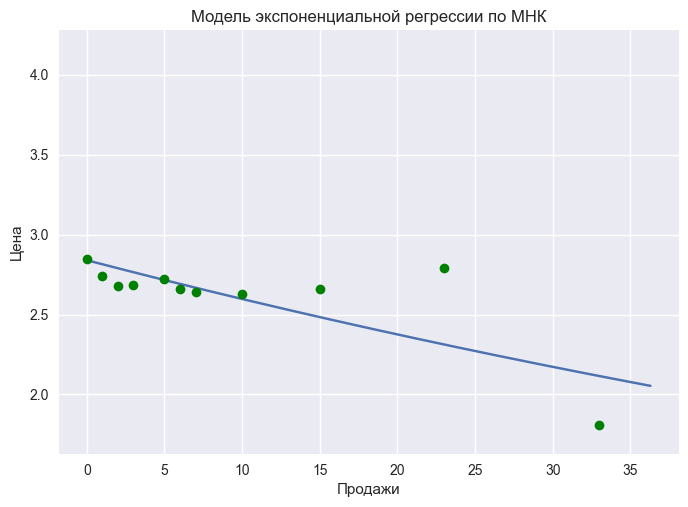

In [330]:
from math import log, e

y_price = np.array([log(x[1]) for x in sales_price_func])
print('Функциональная зависимость:')
print('\n'.join(list(map(lambda i: str([i[0], log(i[1])]), sales_price_func))))
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)
print(f'Функция: f(x)={e ** c[0]} * e**({c[1]}*x)')
x = np.linspace(0, 1.1 * max(sales), 1000)
f_price = e ** c[0] * e ** (c[1] * x)
plt.plot(x, f_price)
plt.ylim(0.9 * min(prices), 1.1 * max(prices))
plt.grid(True)
for i in sales_price_func:
    plt.plot(i[0], i[1], 'go')

plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Модель экспоненциальной регрессии по МНК')
plt.show()

# 5 Семинар

f(x)=19.46-0.02*x1-4.9*x2


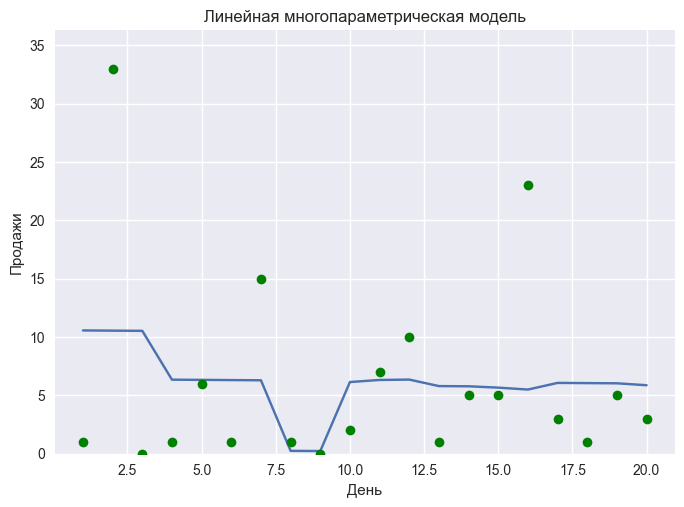

In [331]:
def cint(num):
    return "+" + str(round(num, 2)) if num > 0 else str(round(num, 2))


A_price = np.array([[1, dates[i], prices[i]] for i in range(n)])
y_price = np.array(sales)
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*x2')

x1 = np.array(dates)
x2 = np.array(prices)
y = c[0] + c[1] * x1 + c[2] * x2
plt.plot(x1, y)
plt.ylim(0, 1.1 * max(sales))
plt.grid(True)
for i in range(n):
    plt.plot(dates[i], sales[i], 'go')

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Линейная многопараметрическая модель')
plt.show()

f(x)=18.71-0.68*x1+5.21*log2(x1)+14.2*x2-42.53*log2(x2)


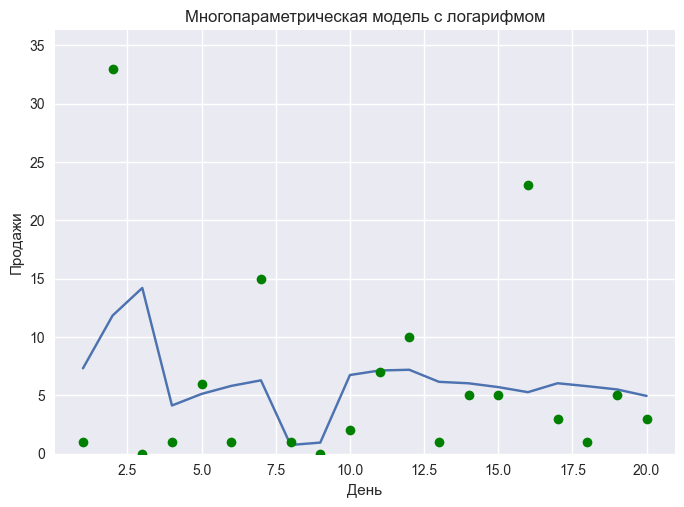

In [332]:
A_price = np.array(
    [[1, dates[i], log(dates[i], 2), prices[i], log(prices[i], 2)] for i in
     range(n)])
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*log2(x1){cint(c[3])}*x2{cint(c[4])}*log2(x2)')

x1 = np.array(dates)
x2 = np.array(prices)
log_y = c[0] + c[1] * x1 + c[2] * np.log2(x1) + c[3] * x2 + c[4] * np.log2(x2)
plt.plot(x1, log_y)
plt.ylim(0, 1.1 * max(sales))
plt.grid(True)
for i in range(n):
    plt.plot(dates[i], sales[i], 'go')

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Многопараметрическая модель с логарифмом')
plt.show()

## Построение в 3х мерном виде

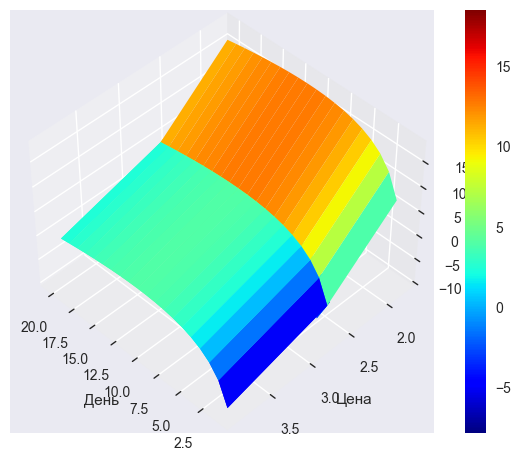

In [333]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(x1, x2)
z = c[0] + c[1] * x + c[2] * np.log2(x) + c[3] * y + c[4] * np.log2(y)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
plt.xlabel('День')
plt.ylabel('Цена')
ax.view_init(45, 135)
plt.show()

# Семинар 6
### Построение динамической регрессионной модели

In [334]:
from itertools import accumulate

curr_df = pd.DataFrame()
curr_df['i'] = range(1, 21)
curr_df['ti'] = dates
curr_df['x'] = prices
curr_df['y'] = sales
curr_df['sum(x)'] = list(accumulate(prices))
curr_df['sum(y)'] = list(accumulate(sales))
curr_df['sum(sum(x))'] = list(accumulate(list(accumulate(prices))))
curr_df['sum(sum(y))'] = list(accumulate(list(accumulate(sales))))

curr_df


,i,ti,x,y,sum(x),sum(y),sum(sum(x)),sum(sum(y))
0,1,1,1.81,1,1.81,1,1.81,1
1,2,2,1.81,33,3.62,34,5.43,35
2,3,3,1.81,0,5.43,34,10.86,69
3,4,4,2.66,1,8.09,35,18.95,104
4,5,5,2.66,6,10.75,41,29.70,145
5,6,6,2.66,1,13.41,42,43.11,187
6,7,7,2.66,15,16.07,57,59.18,244
7,8,8,3.89,1,19.96,58,79.14,302
8,9,9,3.89,0,23.85,58,102.99,360
9,10,10,2.68,2,26.53,60,129.52,420


Построим динамические модели


Коэффициенты первого порядка:
[-1.1243072   0.52760756]
Коэффициенты второго порядка:
[ 0.62367641  0.86446725 -0.31853705]


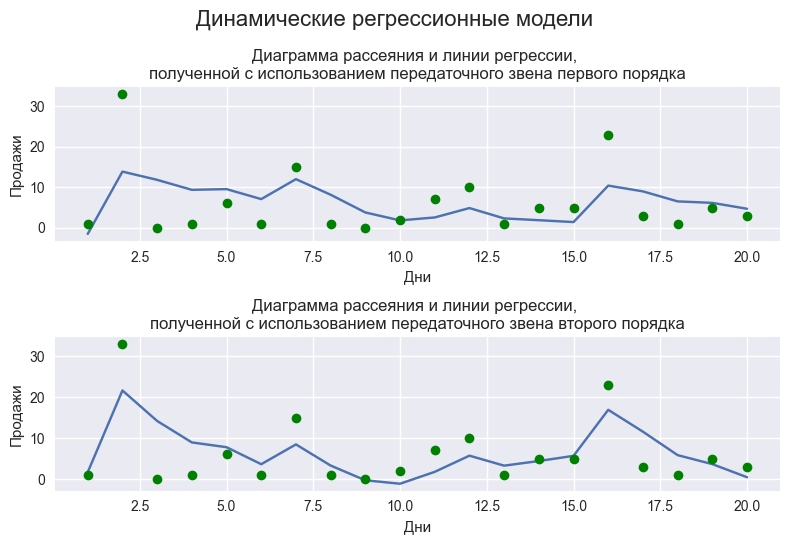

In [335]:
A_price = np.array(
    [[curr_df['sum(x)'][i], curr_df['sum(y)'][i]] for i in range(n)])
c_first = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                        A_price.transpose()), y_price)
print('Коэффициенты первого порядка:')
print(c_first)
A_price = np.array([[curr_df['sum(sum(x))'][i], curr_df['sum(y)'][i],
                     curr_df['sum(sum(y))'][i]] for i in range(n)])
c_second = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                         A_price.transpose()), y_price)

print('Коэффициенты второго порядка:')
print(c_second)
v1 = 0


def create_plot(cs, args, plot: plt.axes):
    func = 0
    for i in range(len(cs)):
        func += cs[i] * args[i]
    global v1
    v1 = func
    plot.plot(dates, func)
    for i in range(n):
        plot.plot(dates[i], sales[i], 'go')
    plot.grid(True)
    return plot


fig, axs = plt.subplots(2, 1)
axs[0] = create_plot(c_first, [curr_df['sum(x)'], curr_df['sum(y)']], axs[0])
axs[0].set_xlabel('Дни')
axs[0].set_ylabel('Продажи')
axs[0].set_title(
    'Диаграмма рассеяния и линии регрессии, \nполученной с использованием передаточного звена первого порядка')
axs[1] = create_plot(c_second, [curr_df['sum(sum(x))'], curr_df['sum(y)'],
                                curr_df['sum(sum(y))']], axs[1])
axs[1].set_xlabel('Дни')
axs[1].set_ylabel('Продажи')
axs[1].set_title(
    'Диаграмма рассеяния и линии регрессии, \nполученной с использованием передаточного звена второго порядка')

plt.suptitle("Динамические регрессионные модели", size=16)
fig.tight_layout()
plt.show()

# Семинар 7

In [336]:
help_table = pd.DataFrame()
help_table['День'] = dates
help_table['V1'] = v1
help_table['V2'] = log_y
help_table['Продажи'] = sales
help_table

,День,V1,V2,Продажи
0,1,1.674784,7.319456,1
1,2,21.629652,11.845106,33
2,3,14.185956,14.209085,0
3,4,8.947168,4.132972,1
4,5,7.778474,5.126969,6
5,6,3.627886,5.814225,1
6,7,8.460762,6.289802,15
7,8,3.298662,0.751265,1
8,9,-0.301805,0.953573,0
9,10,-1.138958,6.746042,2


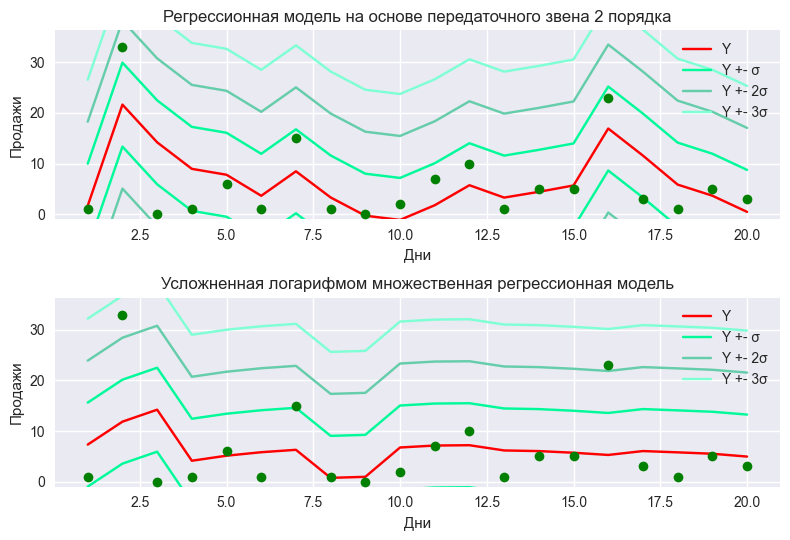

In [337]:


def build_2_3_std(plotik, data, std):
    plotik.plot(dates, data, label='Y', color='red')
    plotik.plot(dates, data + std, color='mediumspringgreen', label='Y +- σ')
    plotik.plot(dates, data - std, color='mediumspringgreen')

    plotik.plot(dates, data + 2 * std, color='mediumaquamarine',
                label='Y +- 2σ')
    plotik.plot(dates, data - 2 * std, color='mediumaquamarine')

    plotik.plot(dates, data + 3 * std, color='aquamarine', label='Y +- 3σ')
    plotik.plot(dates, data - 3 * std, color='aquamarine')
    for i in range(n):
        plotik.plot(dates[i], sales[i], 'go')
    plotik.set_ylim(-1, max(sales) * 1.1)
    plotik.legend(loc='upper right')


fig, axs = plt.subplots(2, 1)
build_2_3_std(axs[0], v1, SD_sale)
axs[0].set_xlabel('Дни')
axs[0].set_ylabel('Продажи')
axs[0].set_title('Регрессионная модель на основе передаточного звена 2 порядка')
build_2_3_std(axs[1], log_y, SD_sale)
axs[1].set_xlabel('Дни')
axs[1].set_ylabel('Продажи')
axs[1].set_title('Усложненная логарифмом множественная регрессионная модель')
fig.tight_layout()
plt.show()

Считаем количество попаданий точек в интервалы

In [338]:
std_intervals = pd.DataFrame()
std = SD_sale
std_intervals[''] = ['1 вар', '2 вар']


def build_ints():
    for i in range(1, 4):
        a = i if i != 1 else ''
        std_intervals[f'+-{a}σ'] = [len(help_table[(help_table['Продажи'] >
                                                    help_table[
                                                        'V1'] - i * std) & (
                                                           help_table[
                                                               'Продажи'] <
                                                           help_table[
                                                               'V1'] + i * std)]),
                                    len(help_table[(help_table['Продажи'] >
                                                    help_table[
                                                        'V2'] - i * std) & (
                                                           help_table[
                                                               'Продажи'] <
                                                           help_table[
                                                               'V2'] + i * std)])]
        std_intervals[f'+-{a}σ%'] = [len(help_table[(help_table['Продажи'] >
                                                     help_table[
                                                         'V1'] - i * std) & (
                                                            help_table[
                                                                'Продажи'] <
                                                            help_table[
                                                                'V1'] + i * std)]) * 100 // n,
                                     len(help_table[(help_table['Продажи'] >
                                                     help_table[
                                                         'V2'] - i * std) & (
                                                            help_table[
                                                                'Продажи'] <
                                                            help_table[
                                                                'V2'] + i * std)]) * 100 // n]


build_ints()

'''
Для того, чтобы гипотеза принималась необходимо, чтобы в первый интервал попадало не менее 68%, а во второй интервал не менее 95% экспериментальных точек. В некоторых случаях проверку дополняют проверкой количества точек в интервале 3σ в который должно попадать не менее 99.7% экспериментальных точек
'''
std_intervals

,,+-σ,+-σ%,+-2σ,+-2σ%,+-3σ,+-3σ%
0,1 вар,17,85,20,100,20,100
1,2 вар,16,80,18,90,20,100


In [339]:
stat = pd.DataFrame()


def mae(act, pred):  #
    diff = pred - act
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff


def rmse(act, pred):
    diff = pred - act
    differences_squared = diff ** 2
    mean_diff = differences_squared.mean()
    rmse_val = np.sqrt(mean_diff)
    return rmse_val


def mape(act, pred):
    act, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100


def mase(act, pred):
    naive_forecast = np.roll(act, 1)
    error = np.abs(act - pred)
    scaled_error = error / np.mean(np.abs(act - naive_forecast))
    return np.mean(scaled_error)


stat[''] = ['1 вар', '2 вар']
stat['MAE'] = [mae(help_table['Продажи'], v1),
               mae(help_table['Продажи'], log_y)]
stat['RMSE'] = [rmse(help_table['Продажи'], v1),
                rmse(help_table['Продажи'], log_y)]

stat['MAPE'] = [mape(help_table['Продажи'], v1),
                mape(help_table['Продажи'], log_y)]

stat['MASE'] = [mase(help_table['Продажи'], v1),
                mase(help_table['Продажи'], log_y)]

stat

C:\Users\slava\AppData\Local\Temp\ipykernel_20584\1786888640.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((act - pred) / act)) * 100


,,MAE,RMSE,MAPE,MASE
0,1 вар,4.366206,5.728055,inf,0.496160
1,2 вар,5.151569,7.775068,inf,0.585406


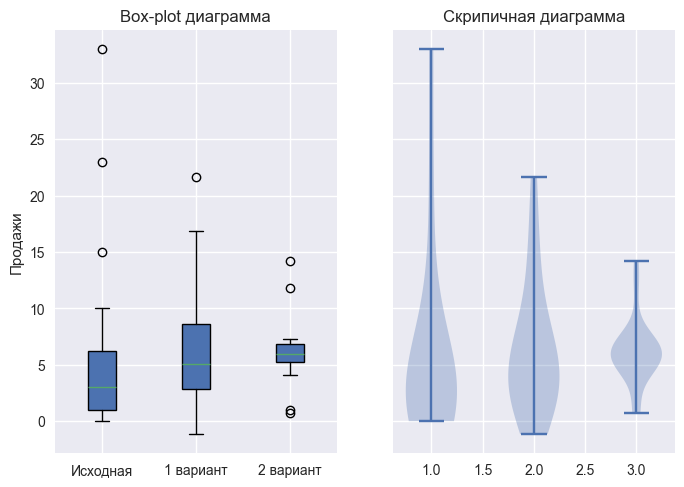

In [340]:
labels = ['Исходная', '1 вариант', '2 вариант']
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].boxplot([sales, v1, log_y], patch_artist=True, vert=True, labels=labels)
ax[0].set_ylabel('Продажи')
ax[0].set_title('Box-plot диаграмма')

ax[1].violinplot([sales, v1, log_y], vert=True)
ax[1].set_title('Скрипичная диаграмма')
plt.show()

# 8 Семинар

### Разбиваем набор данных на обучающую и тестовую выборки

f(x)=19.03-0.97*x1+6.11*log2(x1)+16.24*x2-47.11*log2(x2)


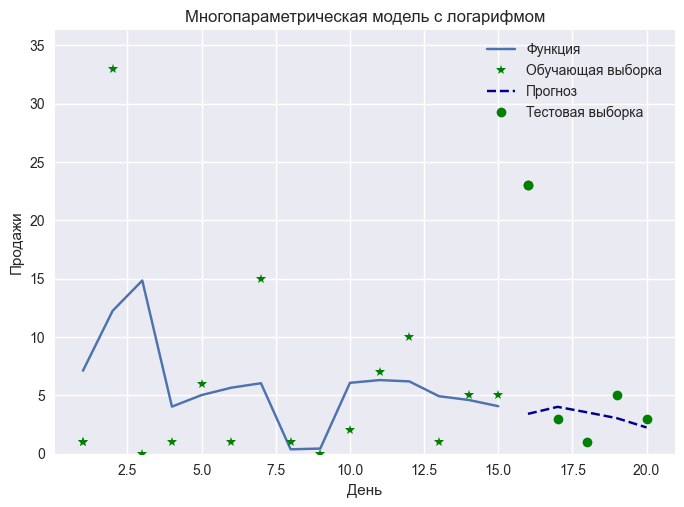

In [341]:
def show_train_test(train_res, train_real, test_pred, test_real, x_train,
                    x_test):
    plt.plot(x_train, train_res, marker='_', label='Функция')
    plt.ylim(0, 1.1 * max(max(train_real), max(test_real)))
    plt.grid(True)
    plt.plot(x_train[0], train_real[0], 'g*', label='Обучающая выборка')
    for i in range(len(x_train)):
        plt.plot(x_train[i], train_real[i], color='green', marker='*')

    plt.plot(x_test, test_pred, label='Прогноз', linestyle='--',
             color='darkblue')
    plt.plot(x_test[0], test_real[0], 'go', label='Тестовая выборка')
    for i in range(len(x_test)):
        plt.plot(x_test[i], test_real[i], color='green', marker='o')


A_price = np.array(
    [[1, dates[i], log(dates[i], 2), prices[i], log(prices[i], 2)] for i in
     range(15)])

train, test = sales[:15], sales[15:]
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), train)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*log2(x1){cint(c[3])}*x2{cint(c[4])}*log2(x2)')

x_train = np.array(dates[:15])
x2 = np.array(prices[:15])
log_y = c[0] + c[1] * x_train + c[2] * np.log2(x_train) + c[3] * x2 + c[
    4] * np.log2(x2)

x1 = np.array(dates[15:])
x2 = np.array(prices[15:])
y_pred = c[0] + c[1] * x1 + c[2] * np.log2(x1) + c[3] * x2 + c[4] * np.log2(x2)

show_train_test(log_y, sales[:15], y_pred, sales[15:], dates[:15], dates[15:])

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Многопараметрическая модель с логарифмом')
plt.legend(loc='upper right')
plt.show()


Проверяем критерий Стьюдента

In [342]:

print(f'F={(np.var(test)) / (np.var(y_pred))}')
print(f'k={5 - 1}')
print('Доверительная вероятность: 0.999')

k = len(y_pred) + len(test) - 2
print(f'k = {k}')
S2 = abs((np.var(test)) - (np.var(y_pred))) / k
print(f'Среднеквадратичная погрешность = {S2}')
n1, n2 = len(test), len(y_pred)
t = abs(np.mean(test) - np.mean(y_pred)) / np.sqrt(S2 * ((n1 * n2) / (n1 + n2)))

print(f't = {t}')
print('t(P, k) = 4.501')
'''
Таким образом, значения однородны
'''


F=188.27878239946338
k=4
Доверительная вероятность: 0.999
k = 8
Среднеквадратичная погрешность = 8.156447561984958
t = 0.8292165511636596
t(P, k) = 4.501


'\nТаким образом, значения однородны\n'

Построить мультипликативную модель разложения временного ряда. Для чего выделить составляющую, полученную на первом шаге выполнения работы, а для оставшейся составляющей выбрать вид функции на основе графика построенных значений и найти коэффициенты с помощью МНК. Проверить качество мультипликативной модели по критериям Фишера и Стьюдента, сравнить полученные результаты с полученными на первом шаге выполнения задания.

In [343]:
multi_model = pd.DataFrame()
multi_model[''] = ['train'] * 15 + ['test'] * 5
multi_model['День'] = dates
multi_model['Цена'] = prices
multi_model['Продажи'] = sales

multi_model['Модельное число продаж'] = np.array(
    pd.concat([pd.Series(log_y), pd.Series(y_pred)]))
multi_model['Остаточное значение'] = multi_model['Продажи'] - multi_model[
    'Модельное число продаж']
multi_model['Остаточное дробью'] = multi_model['Продажи'] / multi_model[
    'Модельное число продаж']

multi_model

,,День,Цена,Продажи,Модельное число продаж,Остаточное значение,Остаточное дробью
0,train,1,1.81,1,7.117434,-6.117434,0.140500
1,train,2,1.81,33,12.248876,20.751124,2.694125
2,train,3,1.81,0,14.845925,-14.845925,0.000000
3,train,4,2.66,1,4.037246,-3.037246,0.247694
4,train,5,2.66,6,5.028096,0.971904,1.193295
5,train,6,2.66,1,5.659316,-4.659316,0.176700
6,train,7,2.66,15,6.042360,8.957640,2.482474
7,train,8,3.89,1,0.379560,0.620440,2.634631
8,train,9,3.89,0,0.442215,-0.442215,0.000000
9,train,10,2.68,2,6.075198,-4.075198,0.329207


[1.12990486 0.23446812 0.15678409]


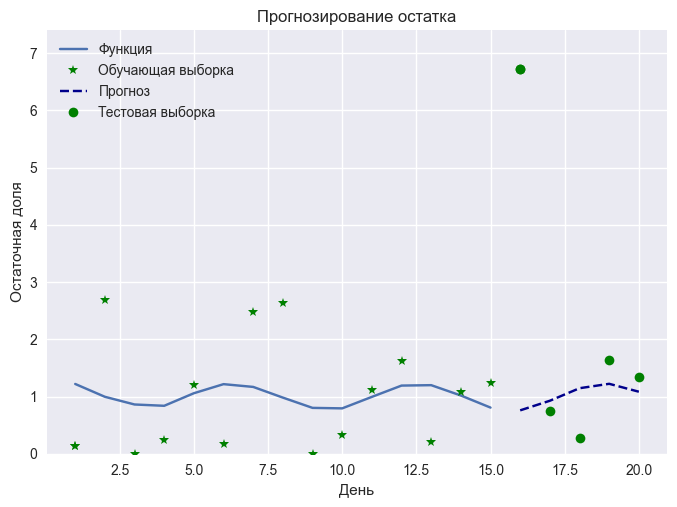

In [344]:
from numpy import cos

A_price = np.array(
    [[1, cos(dates[i]), cos(prices[i])] for i in
     range(15)])

c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), multi_model['Остаточное дробью'][:15])
print(c)

y2_train = c[0] + c[1] * cos(dates[:15]) + c[2] * cos(prices[:15])
y2_test = c[0] + c[1] * cos(dates[15:]) + c[2] * cos(prices[15:])
show_train_test(y2_train, multi_model['Остаточное дробью'][:15], y2_test,
                list(multi_model['Остаточное дробью'][15:]), dates[:15],
                dates[15:])
plt.xlabel('День')
plt.ylabel('Остаточная доля')
plt.title('Прогнозирование остатка')
plt.legend(loc='upper right')
plt.legend()
plt.show()

Теперь можно восстановить значения у2 и построить модель прогнозирования на основе мультипликативной регрессионной модели

In [345]:
final_train = log_y * y2_train
final_test = y_pred * y2_test
multi_model['Восстановленное значение'] = np.array(
    pd.concat([pd.Series(final_train), pd.Series(final_test)]))

multi_model

,,День,Цена,Продажи,Модельное число продаж,Остаточное значение,Остаточное дробью,Восстановленное значение
0,train,1,1.81,1,7.117434,-6.117434,0.140500,8.679296
1,train,2,1.81,33,12.248876,20.751124,2.694125,12.189898
2,train,3,1.81,0,14.845925,-14.845925,0.000000,12.776945
3,train,4,2.66,1,4.037246,-3.037246,0.247694,3.381981
4,train,5,2.66,6,5.028096,0.971904,1.193295,5.317028
5,train,6,2.66,1,5.659316,-4.659316,0.176700,6.882198
6,train,7,2.66,15,6.042360,8.957640,2.482474,7.055782
7,train,8,3.89,1,0.379560,0.620440,2.634631,0.372311
8,train,9,3.89,0,0.442215,-0.442215,0.000000,0.354385
9,train,10,2.68,2,6.075198,-4.075198,0.329207,4.816378


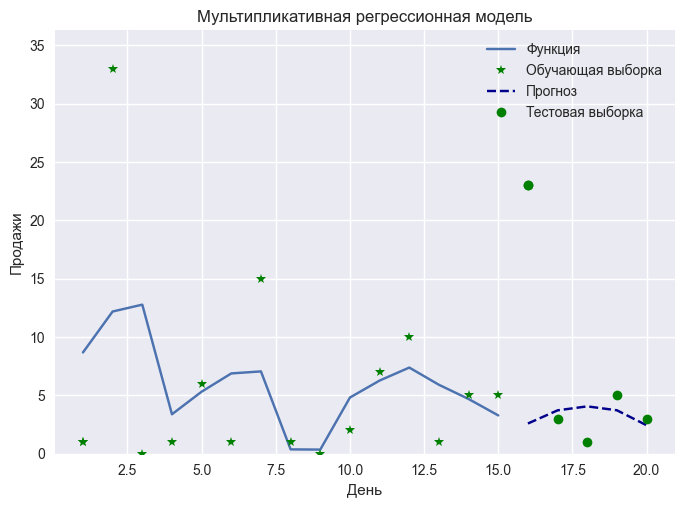

In [346]:

show_train_test(final_train, sales[:15], final_test, list(sales[15:]),
                dates[:15], dates[15:])
plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Мультипликативная регрессионная модель')
plt.legend(loc='upper right')
plt.legend()
plt.show()

Проверим качество мультипликативной модели по критериям Фишера и Стьюдента

In [347]:

print(f'F={(np.var(test)) / (np.var(final_test))}')
print(f'k={5 - 1}')
print('Доверительная вероятность: 0.999')

k = len(final_test) + len(test) - 2
print(f'k = {k}')
S2 = abs((np.std(test) ** 2) - (np.std(final_test) ** 2)) / k
print(f'Среднеквадратичная погрешность = {S2}')
n1, n2 = len(test), len(final_test)
t = (np.mean(test) - np.mean(final_test)) / np.sqrt(
    S2 * ((n1 * n2) / (n1 + n2)))

print(f't = {t}')
print('t(P, k) = 4.501')


F=150.94624764196388
k=4
Доверительная вероятность: 0.999
k = 8
Среднеквадратичная погрешность = 8.145676026213978
t = 0.8184782433645056
t(P, k) = 4.501


# Семинар 9

Разметим данные. Если цена уменьшилась или не изменилась и при этом объем продаж увеличился или не изменился, то присваиваем класс 0 иначе класс 1

,,Цены,Продажи,Класс
0,1,1.81,0,NaN
1,2,1.81,0,0.0
2,3,1.81,1,1.0
3,4,2.63,1,1.0
4,5,2.64,1,0.0
5,6,2.66,1,1.0
6,7,2.66,1,0.0
7,8,2.66,1,1.0
8,9,2.66,2,1.0
9,10,2.67,3,0.0


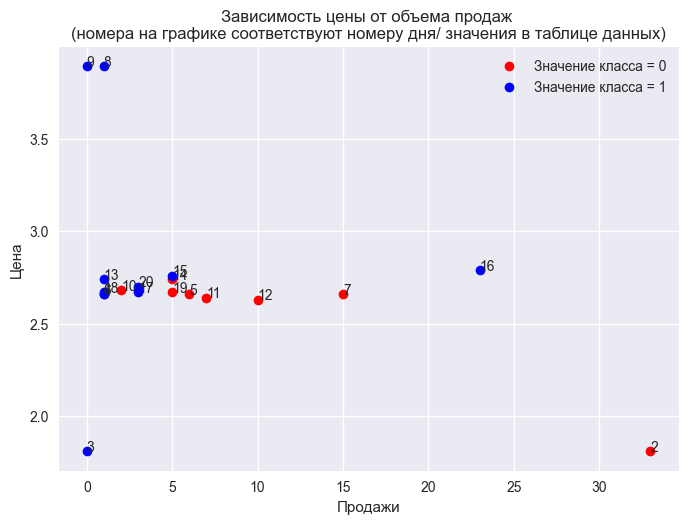

In [348]:

classes = [None]
for i in range(1, n):
    if prices[i] <= prices[i - 1] and sales[i] >= sales[i - 1]:
        classes.append(0)
    else:
        classes.append(1)

class_df = df.copy().drop(['Цены_интервал', 'Продажи_интервал'], axis=1)
class_df['Класс'] = classes
f0 = ''
f1 = ''
for i in range(1, n):
    if classes[i] == 0:
        if not f0:
            f0 = plt.plot(sales[i], prices[i], 'ro', label='Значение класса = 0')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='red')
    else:
        if not f1:
            f1 = plt.plot(sales[i], prices[i], 'bo', label='Значение класса = 1')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='blue')
    plt.annotate(str(dates[i]), (sales[i], prices[i]))
    

plt.legend()
plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')
class_df

Преположим, что каждое 3-к значение класса нам не известно

Text(0.5, 1.0, 'Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')

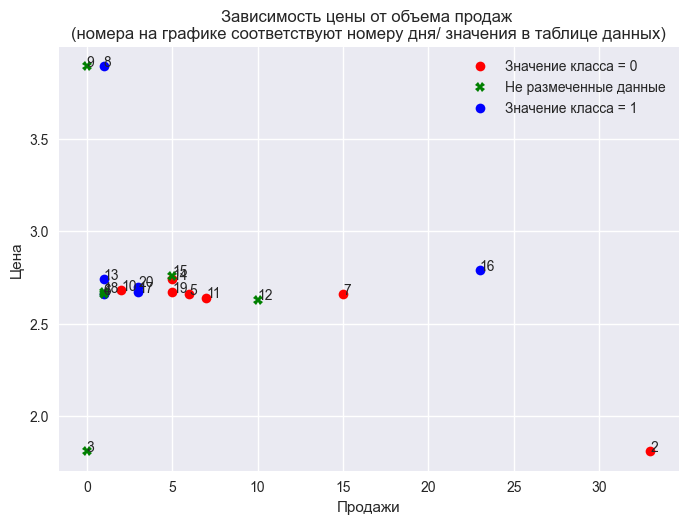

In [349]:
classes_train = [None]
for i in range(1, n):
    if (i+1) % 3 == 0:
        classes_train.append(None)
    elif prices[i] <= prices[i - 1] and sales[i] >= sales[i - 1]:
        classes_train.append(0)
    else:
        classes_train.append(1)

class_df = df.copy().drop(['Цены_интервал', 'Продажи_интервал'], axis=1)
class_df['Класс'] = classes_train
fn = ''
f0 = ''
f1 = ''
for i in range(1, n):
    if classes_train[i] == None:
        if not fn:
            fn = plt.plot(sales[i], prices[i], 'gX', label='Не размеченные данные')
        else:
            plt.plot(sales[i], prices[i], 'gX')
    elif classes_train[i] == 0:
        if not f0:
            f0 = plt.plot(sales[i], prices[i], 'ro', label='Значение класса = 0')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='red')
    else:
        if not f1:
            f1 = plt.plot(sales[i], prices[i], 'bo', label='Значение класса = 1')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='blue')
    plt.annotate(str(dates[i]), (sales[i], prices[i]))
    

plt.legend()
plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')

In [350]:
knn = pd.DataFrame()
knn['1_'] = ['', 'Класс'] + [i for i in classes_train if i != None] + ['', '']
knn['2_'] = ['', 'День'] + [dates[i] for i in range(n) if classes_train[i] != None] + ['', '']
knn['3_'] = ['', 'Цена'] + [prices[i] for i in range(n) if classes_train[i] != None] + ['', '']
knn['День'] = ['Цена', 'Продажи'] + [sales[i] for i in range(n) if classes_train[i] != None] + ['Класс при k=1', 'Класс при k=3']

def count_distance(day1, day2):
    return round(sqrt((prices[day1-1] - prices[day2-1])**2 + (sales[day1-1] - sales[day2-1])**2), 1)

for i in [3, 6, 9, 12, 15, 18]:
    distances = []
    for day in knn['2_'][2:-2]:
        distances.append(count_distance(i, day))
        
    nearest = pd.Series(distances).nsmallest(3).index
    
    k0 = 0
    for j in nearest:
        if knn['1_'][2:-2].values[j] == 0:
            k0 += 1
    k1 = knn['1_'][2:-2].values[nearest[0]]
    k3 = int(k0 <= 1)
    knn[str(i)] = [prices[i-1], sales[i-1]] + distances + [k1, k3]

knn

,1_,2_,3_,День,3,6,9,12,15,18
0,,,,Цена,1.81,2.66,3.89,2.63,2.76,2.67
1,Класс,День,Цена,Продажи,0.00,1.00,0.00,10.00,5.00,1.00
2,0,2,1.81,33,33.00,32.00,33.10,23.00,28.00,32.00
3,1,4,2.66,1,1.30,0.00,1.60,9.00,4.00,0.00
4,0,5,2.66,6,6.10,5.00,6.10,4.00,1.00,5.00
5,0,7,2.66,15,15.00,14.00,15.10,5.00,10.00,14.00
6,1,8,3.89,1,2.30,1.20,1.00,9.10,4.20,1.20
7,0,10,2.68,2,2.20,1.00,2.30,8.00,3.00,1.00
8,0,11,2.64,7,7.00,6.00,7.10,3.00,2.00,6.00
9,1,13,2.74,1,1.40,0.10,1.50,9.00,4.00,0.10


Сравним показатели

In [351]:
compare_df = pd.DataFrame()
compare_df['День'] = [3, 6, 9, 12, 15, 18]
compare_df['Класс'] = [classes[i - 1] for i in [3, 6, 9, 12, 15, 18]]
compare_df['k=1'] = knn.iloc[-2:].values[0][4:]
compare_df['k=3'] = knn.iloc[-2:].values[0][4:]
compare_df

,День,Класс,k=1,k=3
0,3,1,1.0,1.0
1,6,1,1.0,1.0
2,9,1,1.0,1.0
3,12,0,0.0,0.0
4,15,1,0.0,0.0
5,18,1,1.0,1.0


In [352]:
k1_hits = len(compare_df[compare_df['k=1'] == compare_df['Класс']])
k3_hits = len(compare_df[compare_df['k=3'] == compare_df['Класс']])

print(f'Попаданий при k=1: {k1_hits}')
print(f'Попаданий при k=3: {k3_hits}')

Попаданий при k=1: 5
Попаданий при k=3: 5
